In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
fake_news_raw = pd.read_csv('./Fake.csv')
real_news_raw = pd.read_csv('./True.csv')

In [3]:
real_news_raw

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
fake_news_raw["text"].iloc[30]

'In America, we have been having a conversation about police brutality against black Americans. Despite the countless black people murdered unjustly by police, there is usually no justice. Sandra Bland, Philando Castile, Keith Lamont Scott, Michael Brown, Freddie Gray too many to mention here, really. All of those people were senselessly murdered by cops who chose to be their judges, juries, and executioners, and they did so with impunity and without consequence. However, there is hope, and it is coming out of South Carolina, of all places.North Charleston police officer Michael Slager murdered Walter Scott, a black man who was fleeing after a routine traffic stop in cold blood in 2015. He would have gotten away with it, too, had it not been for a citizen who was brave enough to tape the murder. The tape showed that Slager had lied about his life being in danger, and it showed him cuffing Scott s lifeless body, and then planting a taser as  evidence.  Here is the news report of that da

In [5]:
real_news_raw["label"] = "true"
fake_news_raw["label"] = "false"

In [6]:
all_news = pd.concat([real_news_raw, fake_news_raw])
all_news

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",news
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",news
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",news
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",news
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",news
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",not_news
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",not_news
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",not_news
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",not_news


In [7]:
all_news.groupby(["subject", "label"]).count().reset_index()

,subject,label,title,text,date
0,Government News,not_news,1570,1570,1570
1,Middle-east,not_news,778,778,778
2,News,not_news,9050,9050,9050
3,US_News,not_news,783,783,783
4,left-news,not_news,4459,4459,4459
5,politics,not_news,6841,6841,6841
6,politicsNews,news,11272,11272,11272
7,worldnews,news,10145,10145,10145


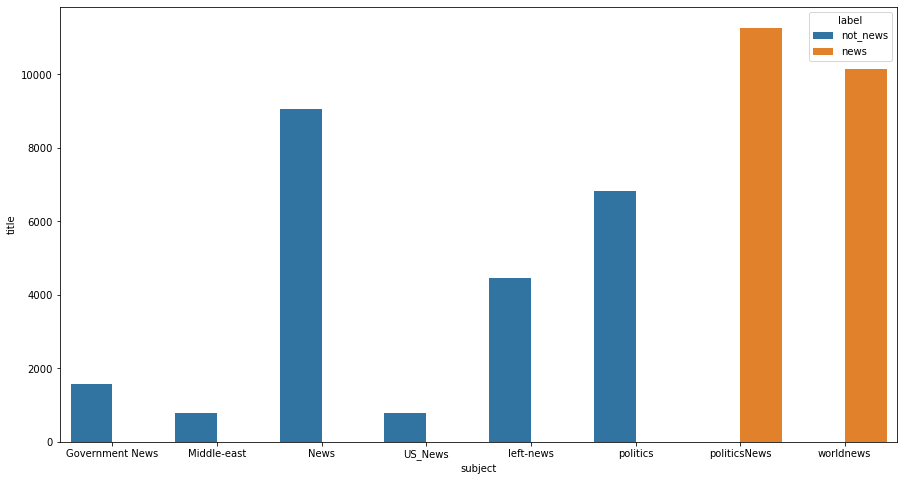

In [8]:
plt.figure(figsize=(15,8))
sns.barplot(
    data=all_news.groupby(["subject", "label"]).count().reset_index(),
    x="subject",
    y="title",
    hue="label"
)

In [9]:
del all_news["subject"]

In [10]:
all_news = all_news[~all_news["date"].str.contains("https")]

In [11]:
date_regexp = "JAN|FEB|MAR|APR|MAY|JUN|JUL|AUG|SEP|OCT|NOV|DEC"

In [12]:
all_news = all_news[all_news["date"].str.contains(date_regexp, case=False)]

In [13]:
all_news["date"] = pd.to_datetime(all_news["date"], infer_datetime_format=True)

In [14]:
all_news["fulltext"] = all_news["title"] + " " + all_news["text"]

In [15]:
all_news.head()

,title,text,date,label,fulltext
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,2017-12-31,news,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,2017-12-29,news,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,2017-12-31,news,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,2017-12-30,news,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,2017-12-29,news,Trump wants Postal Service to charge 'much mor...


In [16]:
all_news.groupby(["date", "label"]).count().reset_index()

,date,label,title,text,fulltext
0,2015-03-31,not_news,8,8,8
1,2015-04-01,not_news,2,2,2
2,2015-04-02,not_news,1,1,1
3,2015-04-04,not_news,5,5,5
4,2015-04-05,not_news,13,13,13
...,...,...,...,...,...
1721,2018-02-15,not_news,9,9,9
1722,2018-02-16,not_news,8,8,8
1723,2018-02-17,not_news,7,7,7
1724,2018-02-18,not_news,7,7,7


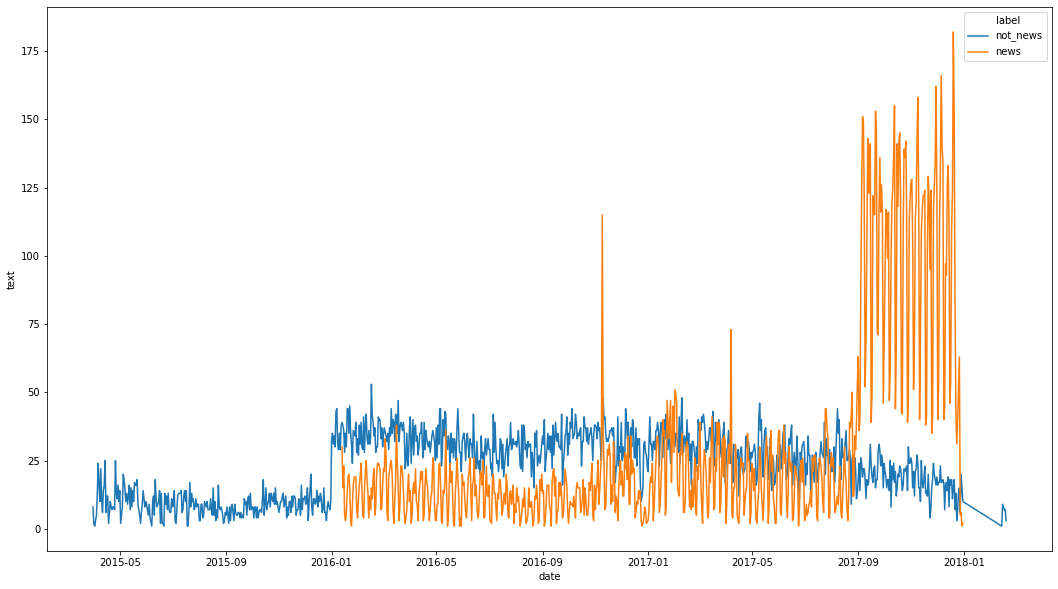

In [17]:
plt.figure(figsize=(18,10))
sns.lineplot(
    data=all_news.groupby(["date", "label"]).count().reset_index(),
    x="date",
    y="text",
    hue="label"
)

In [18]:
del all_news["date"]

In [19]:
all_news['text_length'] = all_news['fulltext'].apply(len)

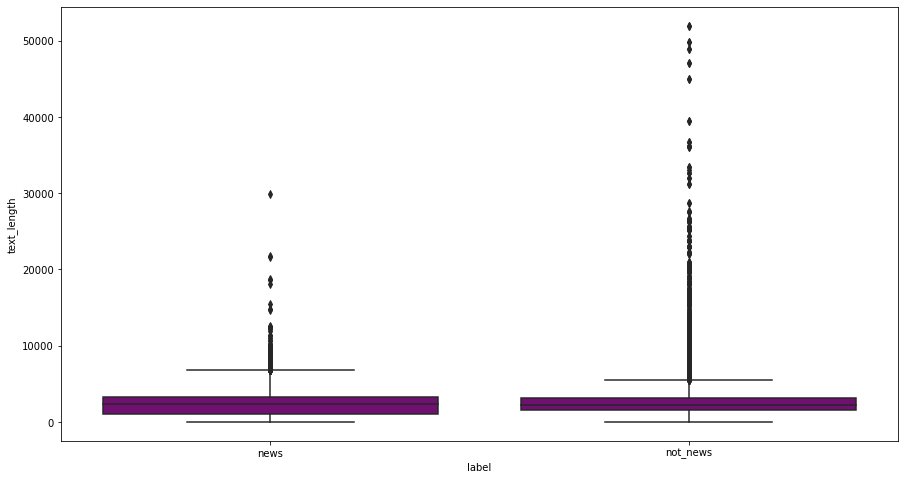

In [20]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(
    data=all_news,
    x="label",
    y="text_length",
    orient="v",
    color="purple",
)

In [21]:
from string import punctuation
from nltk.corpus import stopwords
import re

In [22]:
STOPWORDS = tuple(stopwords.words('english'))

In [23]:
non_punc_regex = r"[a-zA-Z0-9\s]"

In [24]:
def clean_text(
    text
):
    stripped = text.strip()
    remove_punc = ''.join([char for char in stripped if re.match(non_punc_regex, char)])
    tokenised = [w for w in re.split("\s+", remove_punc) if w.lower() not in STOPWORDS]
    return tokenised

In [25]:
clean_text(all_news['fulltext'].iloc[10])

['Jones',
 'certified',
 'US',
 'Senate',
 'winner',
 'despite',
 'Moore',
 'challenge',
 'Reuters',
 'Alabama',
 'officials',
 'Thursday',
 'certified',
 'Democrat',
 'Doug',
 'Jones',
 'winner',
 'states',
 'US',
 'Senate',
 'race',
 'state',
 'judge',
 'denied',
 'challenge',
 'Republican',
 'Roy',
 'Moore',
 'whose',
 'campaign',
 'derailed',
 'accusations',
 'sexual',
 'misconduct',
 'teenage',
 'girls',
 'Jones',
 'vacant',
 'seat',
 '22000',
 'votes',
 '16',
 'percentage',
 'points',
 'election',
 'officials',
 'said',
 'made',
 'first',
 'Democrat',
 'quarter',
 'century',
 'win',
 'Senate',
 'seat',
 'Alabama',
 'seat',
 'previously',
 'held',
 'Republican',
 'Jeff',
 'Sessions',
 'tapped',
 'US',
 'President',
 'Donald',
 'Trump',
 'attorney',
 'general',
 'state',
 'canvassing',
 'board',
 'composed',
 'Alabama',
 'Secretary',
 'State',
 'John',
 'Merrill',
 'Governor',
 'Kay',
 'Ivey',
 'Attorney',
 'General',
 'Steve',
 'Marshall',
 'certified',
 'election',
 'results',
 '

In [26]:
# all_news['tokenised'] = all_news['fulltext'].apply(clean_text)

In [27]:
# all_news['tokenised'].head()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [29]:
# cv = CountVectorizer(analyzer=clean_text).fit(all_news["fulltext"])

In [30]:
# [(k, v) for k, v in cv.vocabulary_.items()][:5]

In [31]:
# test_msg = all_news['fulltext'].iloc[6000]
# test_msg

In [32]:
# test_msg_matrix = cv.transform([test_msg])
# print(test_msg_matrix)

In [33]:
# test_msg_matrix.shape

In [34]:
# cv.get_feature_names()[78124]

In [35]:
# bag_of_words = cv.transform(all_news['fulltext'])

In [36]:
# bag_of_words.shape

In [37]:
# f"Sparcity: {100 * bag_of_words.nnz / (bag_of_words.shape[0] * bag_of_words.shape[1])}"

In [38]:
# tfidf = TfidfTransformer().fit(bag_of_words)

In [39]:
# test_tdidf = tfidf.transform(bag_of_words[6000])

In [40]:
# print(test_tdidf)

In [41]:
# tfidf_text = tfidf.transform(bag_of_words)

In [42]:
# tfidf_text.shape

In [43]:
# classifier = MultinomialNB().fit(tfidf_text, all_news["label"])

In [44]:
# all_news.iloc[6000]

In [45]:
# classifier.predict(test_tdidf)

In [46]:
from sklearn.pipeline import Pipeline

In [47]:
news_classifier_pipeline = Pipeline([
    ("matrix", CountVectorizer(analyzer=clean_text)),
    ("tfidf", TfidfTransformer()),
    ("classify", MultinomialNB()),
])

In [48]:
msg_train, msg_test, label_train, label_test = train_test_split(
    all_news["fulltext"], all_news["label"], test_size=0.33, random_state=42
)

In [49]:
msg_train

21999    CIA Operative Admits Deep State Globalist Cont...
1065     U.S. condemns Russia veto of probe into Syria ...
2664     U.S., China disagreed on how to reduce U.S. tr...
22999    Ben Stein Calls Out 9th Circuit Court: Committ...
1206      CNN Fires Reza Aslan For Describing Trump As ...
                               ...                        
11284    Nigeria says U.S. agrees delayed $593 million ...
23325    Boiler Room #61 – Hello From the Gutter Tune i...
16746    HOW 125,000 ILLEGAL KIDS Have Been Able To Avo...
860      Republican tax plan would deal financial hit t...
15795    U.N. refugee commissioner says Australia must ...
Name: fulltext, Length: 30074, dtype: object

In [50]:
label_train

21999    not_news
1065         news
2664         news
22999    not_news
1206     not_news
           ...   
11284        news
23325    not_news
16746    not_news
860          news
15795        news
Name: label, Length: 30074, dtype: object

In [51]:
news_classifier_pipeline.fit(msg_train, label_train)

Pipeline(steps=[('matrix',
                 CountVectorizer(analyzer=<function clean_text at 0x0000013F27332160>)),
                ('tfidf', TfidfTransformer()), ('classify', MultinomialNB())])

In [52]:
predictions = news_classifier_pipeline.predict(msg_test)

In [53]:
predictions

array(['news', 'not_news', 'news', ..., 'news', 'not_news', 'not_news'],
      dtype='<U8')

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

        news       0.95      0.96      0.96      7086
    not_news       0.97      0.95      0.96      7728

    accuracy                           0.96     14814
   macro avg       0.96      0.96      0.96     14814
weighted avg       0.96      0.96      0.96     14814



In [56]:
test_article = """
New organ in the human throat may have been discovered by Dutch scientists
(CNN) - It's hard to imagine there is a part of the human body that's gone unnoticed by doctors after centuries of medical research.

But that's exactly what a group of scientists from the Netherlands believe. They said they have discovered a pair of previously overlooked glands that are hidden away in our skulls where the nasal cavity and the throat meet.

The medical researchers first came across the body part, which they propose naming tubarial glands, during a scan designed to look for tumorous growths. The scientists then looked at scans of the head and neck of a further 100 individuals they were treating for prostrate cancer and dissected two cadavers -- one male and one female. They all had a set.

The discovery was "thrilling" but the authors were "a bit skeptical" at first, said the study's lead author Matthijs H. Valstar, a surgeon in the department of head and neck oncology and surgery at The Netherlands Cancer Institute.

"We thought it wasn't possible to discover this in 2020," Valstar said. "It's important it's replicated and it should be done with different series of patients. It's important to have confirmation of new medical findings."

The glands cannot be seen with conventional methods of medical imaging like ultrasound, CT scans (computerized topography) or MRI (magnetic resonance imaging), the study authors said.

The "unknown entity" was only identified when the doctors were using an advanced and new type of scan called PSMA PET/CT that has been used to detect the spread of prostate cancer. PSMA PET is shorthand for prostate-specific membrane antigen imaging using positron emission tomography.

Salivary glands show up clearly on this highly sensitive kind of imaging.

"People have three sets of large salivary glands, but not there," said study author Wouter Vogel, a radiation oncologist at The Netherlands Cancer Institute, in a news statement in May. "As far as we knew, the only salivary or mucous glands in the nasopharynx are microscopically small, and up to 1000 are evenly spread out throughout the mucosa. So, imagine our surprise when we found these."

Many great scientific discoveries "come as a surprise — an incidental finding," said Joy Reidenberg, a professor of anatomy at the Icahn School of Medicine at Mount Sinai in New York City, who wasn't involved in the study.

"Luckily, these researchers were tuned into the data, and were anatomically savvy enough to note the unusual brightness in a region that was not thought to contain any salivary glands," Reidenberg added via email. "As the famous (late French biologist) Louis Pasteur once said: 'Chance favors the prepared mind.'"

New organ?

It was a matter of debate whether the tubarial glands were a completely new organ or could be considered part of the salivary gland organ system, the study added.

"These findings support the identification of the tubarial glands as a new anatomical and functional entity," said the study, which published in the journal Radiotherapy and Oncology.

The glands could be newly discovered, "but it is difficult to exclude that these might represent groups of minor salivary glands," said Dr. Valerie Fitzhugh, the interim chair of pathology at Rutgers New Jersey Medical School and Rutgers Robert Wood Johnson Medical School. Fitzhugh wasn't involved in the study.

Because the study concentrated on a small number of patients who were mostly male and used specific rather than standard tests, she added, examination of more women and healthier patients would allow for better data.

Overall, there is "still much to learn about the human body," Fitzhugh said, "and technology is allowing us to make these discoveries. This might be the first of some exciting discoveries within the body."

No matter how the glands are described, the authors said their discovery had clinical implications, especially for patients with head and neck cancer, including tumors in the throat or tongue. Radiotherapy can damage salivary glands, which can lead to dry mouth and trouble swallowing, speaking and eating.

"For most patients, it should technically be possible to avoid delivering radiation to this newly discovered location of the salivary gland system in the same way we try to spare known glands," Vogel said.

"Our next step is to find out how we can best spare these new glands and in which patients. If we can do this, patients may experience less side effects which will benefit their overall quality of life after treatment."
"""

In [57]:
test_article2 = """
Man Bear Pig is real, I'm super cereal.

He has the head of a man, and the body of a bear pig. Or the body of a bear man and the head of a pig. 
Look, it's not important. 
What's important is that we pull together to try and stop him as he's the biggest threat to mankind since the NAZIS.
"""

In [58]:
test_article3 = """
Edward Snowden gets permanent residency in Russia - lawyer
Moscow (CNN) - Former US National Security Agency contractor Edward Snowden has been given permanent residency in Russia, his lawyer Anatoly Kucherena told state-run news agency RIA Novosti.

Snowden had requested a three-year extension of the permit this spring as it was set to expire in April 2020 but the procedure stalled because of the coronavirus pandemic, according to Kucherena.

The 37-year-old is accused of espionage and theft of government property in the US for leaking troves of information on American intelligence and mass surveillance program to the media.

Snowden has been living in exile in Moscow after initially traveling to Hong Kong following his 2013 public disclosure of the classified information.

Russian government granted him asylum and extended the residency permit in 2017 until 2020.

In 2016, US Congress released a report saying Snowden has been in contact with Russian intelligence officials since his arrival to Russia, a claim Snowden denied. In an interview in September last year, Snowden said he would be willing to return to the US if he is guaranteed a fair trial.

"One of the big topics in Europe right now is should Germany and France invite me in to get asylum," he said. "And of course I would like to return to the United States. That is the ultimate goal. But if I'm going to spend the rest of my life in prison, the one bottom-line demand that we all have to agree to is that at least I get a fair trial. And that's the one thing the government has refused to guarantee because they won't provide access to what's called a public interest defense," Snowden told CBS co-hosts Gayle King and Tony Dokoupil on "CBS This Morning."

He added: "I'm not asking for a parade. I'm not asking for a pardon. I'm not asking for a pass. What I'm asking for is a fair trial. And this is the bottom-line that any American should require."
"""

In [59]:
test_article4 = """
Moment hero passenger steps in to pay ‘ridiculous’ Ryanair baggage fee for stressed out mum
A HEARTWARMING video shows the moment a Ryanair passenger steps in to pay the baggage fee for a stressed out mum.

The “hero” was filmed footing the £50 bill for the mum-of-three, after staff at Ibiza airport deemed her bag too big to be carried on board.

A fellow passenger captured the moment on Sunday, as the travellers were attempting to board a flight to Stansted airport.

As the video begins, the young man can be seen checking his phone near the boarding gate, while the frazzled mum struggles to decide what to do about the fee for the bag.

As two of her children chase each other around the airport, she stands at the desk looking stressed.

Seeing her distress, the stranger turns around and reassures her, saying: “It’s alright, it’s alright. Don't worry I'll pay for you."

Do you know the kind-hearted passengers? Call The Sun Online newsdesk on 0207 782 4368 or e-mail richard.wheatstone@the-sun.co.uk

He then approaches the desk and hands over his card for payment.

The touching moment was posted on Twitter by a fellow passenger, who shared the video.

They said: “Well done to this young hero for paying the ridiculous Ryanair baggage charges for a distressed mother travelling with three kids (who wasn’t getting any leniency from ground staff).

“The flight from Ibiza to Stansted was half empty, not sure what difference a few cm would make.”

The video, which has since been viewed hundred of thousands of times, has earned the gentleman heaps of praise.

The passenger later added: “Great kid isn’t he? No idea who he is though, kept himself to himself and acted honourably and discreetly without a fuss.”

Speaking today, the 46-year-old traveller said: "As far as I could tell, the mother with her children had got caught out with a bag that exceeded the allowance on her ticket."

He added: "She was upset and rather tearful while also trying to keep an eye on her kids.

"By the time I figured out what was going on, a young man stepped up to the ground handling staff and was heard to say 'it’s okay, I’ll pay'.

"The man preferred to remain anonymous."
"""

In [60]:
news_classifier_pipeline.predict([test_article, test_article2, test_article3, test_article4])

array(['not_news', 'not_news', 'news', 'not_news'], dtype='<U8')